In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/linear_train.csv')

In [5]:
a=data.to_numpy()

In [6]:
a

array([[ 0.00000000e+00, -2.84685568e+02,  2.84567363e+02, ...,
         8.39780551e+01,  7.37317448e+02, -2.18016231e+02],
       [ 1.00000000e+00, -4.28480005e+02,  3.07240676e+02, ...,
        -5.55216301e+01,  7.75407458e+02,  1.54140849e+02],
       [ 2.00000000e+00, -2.58008787e+01,  2.37433758e+02, ...,
         3.02121708e+02,  8.10402101e+02,  3.94849701e+02],
       ...,
       [ 4.99970000e+04, -2.54691431e+02,  2.56793278e+02, ...,
         1.88422643e+02,  7.48559054e+02, -3.44448897e+00],
       [ 4.99980000e+04,  7.10054262e+02,  2.57565009e+02, ...,
         8.95278167e+01,  7.57012968e+02,  4.45356781e+02],
       [ 4.99990000e+04, -2.69821407e+02,  2.81097270e+02, ...,
         1.44270028e+02,  7.32900535e+02, -5.00924681e+02]])

In [7]:
x_t=a[:,range(1,21)]

In [8]:
x_t

array([[-2.84685568e+02,  2.84567363e+02,  1.84627063e+01, ...,
        -1.20010842e+01,  8.39780551e+01,  7.37317448e+02],
       [-4.28480005e+02,  3.07240676e+02,  2.26328973e+01, ...,
         1.80573704e+01, -5.55216301e+01,  7.75407458e+02],
       [-2.58008787e+01,  2.37433758e+02, -4.67504670e-01, ...,
         7.06526251e+01,  3.02121708e+02,  8.10402101e+02],
       ...,
       [-2.54691431e+02,  2.56793278e+02,  2.31974534e+01, ...,
        -2.30785214e+01,  1.88422643e+02,  7.48559054e+02],
       [ 7.10054262e+02,  2.57565009e+02, -1.63356012e+01, ...,
         1.52388356e+01,  8.95278167e+01,  7.57012968e+02],
       [-2.69821407e+02,  2.81097270e+02, -3.05824270e+01, ...,
         8.34763802e+00,  1.44270028e+02,  7.32900535e+02]])

In [9]:
x_t.shape

(50000, 20)

In [10]:
y_train=a[:,21]

In [11]:
y_train

array([-218.01623149,  154.14084898,  394.84970115, ...,   -3.44448897,
        445.35678148, -500.9246807 ])

In [12]:
y_train.shape

(50000,)

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

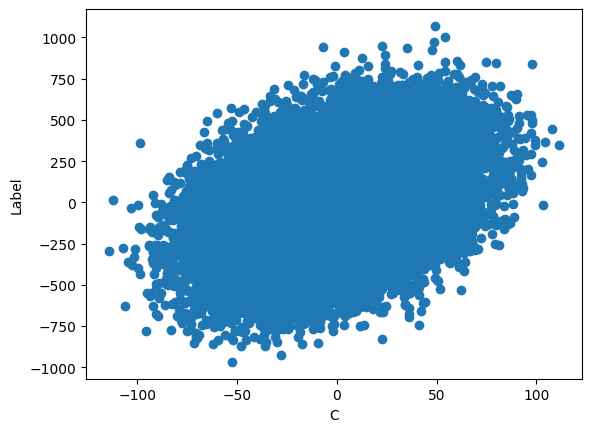

In [14]:
plt.scatter(x_t[:,2],y_train)
plt.xlabel('C')
plt.ylabel('Label')
plt.show

In [15]:
mean=np.zeros(20)
dev=np.zeros(20)
for j in range(20):
  mean[j]=np.mean(x_t[:,j])
  dev[j]=np.std(x_t[:,j])
x_train=(x_t-mean)/dev

<function matplotlib.pyplot.show(close=None, block=None)>

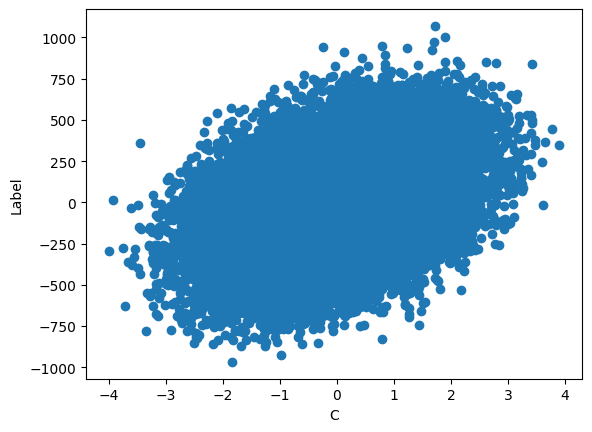

In [16]:
plt.scatter(x_train[:,2],y_train)
plt.xlabel('C')
plt.ylabel('Label')
plt.show

In [17]:
def compute_cost(x,y,w,b):
  cost=(np.sum((np.dot(x,w)+b-y)**2))/(2*x.shape[0])
  return cost

In [18]:
def compute_gradient(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros(n)
  yp=np.dot(x,w)+b-y
  dj_db=np.sum(yp)/m
  dj_dw=np.dot(yp,x)/m
  return dj_dw,dj_db

In [19]:
alpha=0.1
j_hist=[]
w_test=np.zeros(20)
b_test=0.
print('Number of Iterations        Cost')
for i in range(1,1001):
  c=compute_cost(x_train,y_train,w_test,b_test)
  j_hist.append(c)
  tdj_dw,tdj_db=compute_gradient(x_train,y_train,w_test,b_test)
  w_test-=alpha*tdj_dw
  b_test-=alpha*tdj_db
  if(i/100 in range(11)):
    print('%11s'%i,'        ',c)

Number of Iterations        Cost
        100          4769.76872476984
        200          4769.768702764219
        300          4769.768702764219
        400          4769.768702764218
        500          4769.768702764218
        600          4769.768702764218
        700          4769.768702764218
        800          4769.768702764218
        900          4769.768702764218
       1000          4769.768702764218


Text(0.5, 0, 'Number of Iterations')

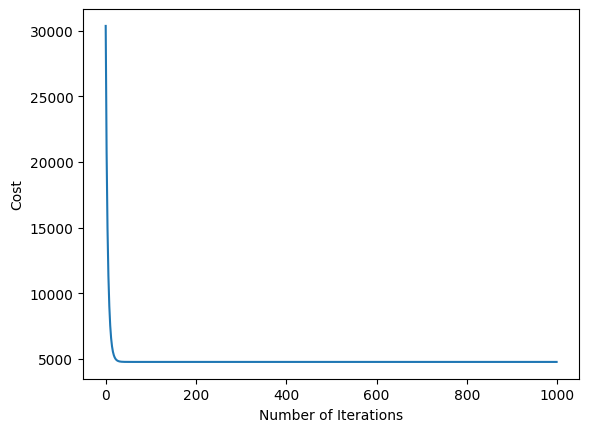

In [20]:
plt.plot(np.arange(len(j_hist)),j_hist)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

In [21]:
def predict(x,w,b):
  p=np.dot(x,w)+b
  return p

<function matplotlib.pyplot.show(close=None, block=None)>

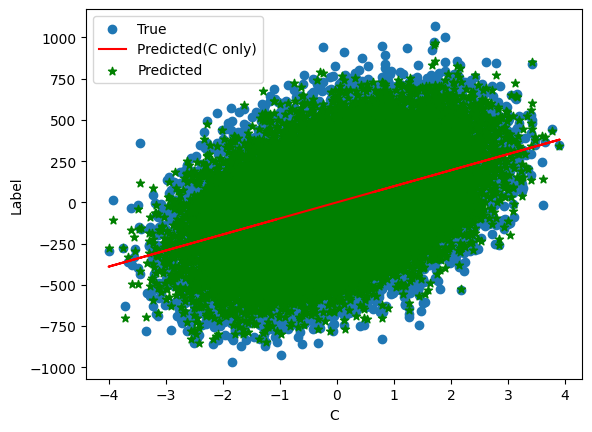

In [22]:
pred=predict(x_train,w_test,b_test)
plt.scatter(x_train[:,2],y_train,label='True')
plt.plot(x_train[:,2],w_test[2]*x_train[:,2],c='r',label='Predicted(C only)')
plt.scatter(x_train[:,2],pred,marker='*',c='g',label='Predicted')
plt.xlabel('C')
plt.ylabel('Label')
plt.legend()
plt.show

In [23]:
w_test

array([72.99699525, 66.2490529 , 97.4425186 ,  1.71779334, 17.36335083,
       24.81613091, 71.23331344, 30.9955866 , 20.35046335, 93.74922464,
       39.36887221, 37.25519822,  2.82784069, 40.70115181, 40.70115181,
       46.08723061, 21.51569207, 33.84608326, 33.68446217, 39.24757584])

In [24]:
b_test

-0.3656507349311582

In [25]:
new_data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/linear_test_data.csv')
new_a=new_data.to_numpy()

In [26]:
new_a

array([[ 9.63960000e+04,  1.46790641e+02,  2.23711806e+02, ...,
         4.88054597e+00,  1.25785551e+02,  8.00204772e+02],
       [ 8.01660000e+04,  3.32536530e+01,  2.85935229e+02, ...,
         3.07482642e+01,  1.30832421e+02,  7.36119143e+02],
       [ 2.05160000e+04,  1.80531799e+02,  2.08420343e+02, ...,
        -4.42265754e+01,  7.93928048e+00,  8.33656738e+02],
       ...,
       [ 9.96370000e+04, -2.08062150e+02,  2.18788471e+02, ...,
        -5.94135997e+00, -6.78212234e+01,  8.11022376e+02],
       [ 8.46160000e+04,  2.46772616e+02,  2.29348154e+02, ...,
         6.73488579e+01,  3.63347336e+02,  7.48942688e+02],
       [ 6.62100000e+04,  1.51898254e+02,  2.61236986e+02, ...,
         8.99945060e+00, -2.27032202e+01,  7.90467071e+02]])

In [27]:
new_a.shape

(20000, 21)

In [28]:
x_in=new_a[:,range(1,21)]

In [29]:
x_in

array([[ 146.79064077,  223.71180565,   -0.88137077, ...,    4.88054597,
         125.78555074,  800.20477227],
       [  33.25365297,  285.93522871,   -3.35261115, ...,   30.74826423,
         130.8324214 ,  736.11914334],
       [ 180.53179872,  208.42034341,    9.84618777, ...,  -44.22657541,
           7.93928048,  833.65673771],
       ...,
       [-208.06214994,  218.78847063,   -9.15764925, ...,   -5.94135997,
         -67.82122337,  811.02237566],
       [ 246.77261619,  229.34815412,   54.29351768, ...,   67.34885785,
         363.34733553,  748.9426883 ],
       [ 151.89825368,  261.23698597,  -85.46693489, ...,    8.9994506 ,
         -22.70322019,  790.46707145]])

In [30]:
x_in.shape

(20000, 20)

In [31]:
x_test=(x_in-mean)/dev

In [32]:
x_test

array([[ 0.51295395, -0.92035479, -0.02931054, ...,  0.16734961,
         0.44035707,  0.39024018],
       [ 0.11556997,  1.2554317 , -0.11572853, ...,  1.07281078,
         0.47576277, -1.86041599],
       [ 0.63104935, -1.45505628,  0.34582658, ..., -1.55157244,
        -0.38637884,  1.56505697],
       ...,
       [-0.72904495, -1.09251064, -0.31872768, ..., -0.21145518,
        -0.91786727,  0.77014916],
       [ 0.86289485, -0.72326678,  1.9001265 , ...,  2.35396035,
         2.10694235, -1.41005931],
       [ 0.5308308 ,  0.39180028, -2.98722356, ...,  0.31152577,
        -0.60134751,  0.04825686]])

In [33]:
x_test.shape

(20000, 20)

<function matplotlib.pyplot.show(close=None, block=None)>

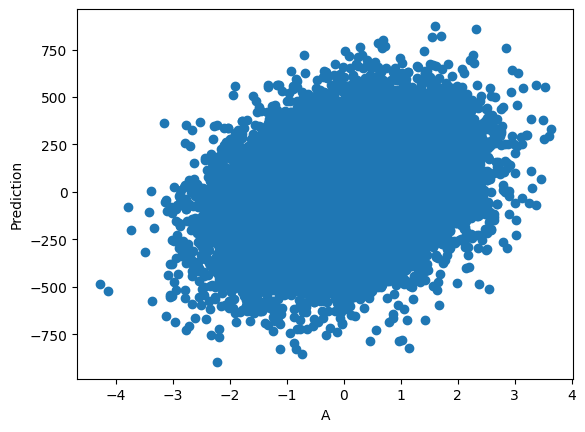

In [34]:
y_test=predict(x_test,w_test,b_test)
plt.scatter(x_test[:,0],y_test)
plt.xlabel('A')
plt.ylabel('Prediction')
plt.show

In [35]:
y_test

array([   8.11417104,  166.78132515,   69.57024177, ...,   93.53774291,
        305.91965984, -165.02441345])

In [36]:
Predictions=new_data.drop(new_data.columns[[i for i in range(1,21)]], axis=1)
Predictions['Predicted']=y_test
Predictions.to_csv('/content/drive/MyDrive/WOC ML Data/Linear_Predictions.csv', index=False)